# Restaurants Reviews

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import Word, TextBlob

In [372]:
# https://www.kaggle.com/vigneshwarsofficial/reviews

In [373]:
df = pd.read_csv('/Users/hernantrujillo/Documents/Metis/NBM_Unsupervised_Student-main/Restaurant_Reviews.tsv', delimiter='\t', quoting = 3) #3 means ignoring double quotes 

In [374]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [375]:
df.Review

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [376]:
df.shape

(1000, 2)

In [377]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [378]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [380]:
df["Liked"].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [381]:
liked_perc = round(df.Liked.value_counts() / len(df) *100, 2)
liked_perc

1    50.0
0    50.0
Name: Liked, dtype: float64

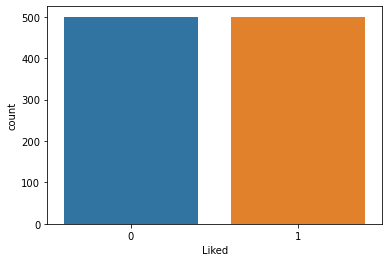

In [382]:
sns.countplot(x = df["Liked"])
plt.savefig('/Users/hernantrujillo/Documents/Metis/NBM_Unsupervised_Student-main/charts/reviews.png')

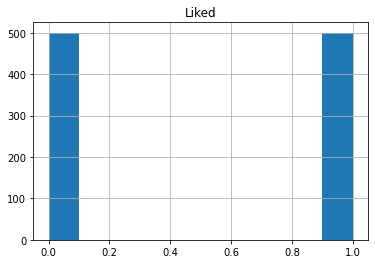

In [383]:
df.hist();

In [384]:
#Impoorting required packages
import re

#dopwnloading Stopwords list
import nltk
nltk.download('stopwords')

#importing stopwords
from nltk.corpus import stopwords

#importing stemming package
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hernantrujillo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [385]:
#Cleaning the texts
#Removing puncutations, and number
#^ represents don't want to remove
#Keeping the letters a to z and A to Z with space
#collection of text is called as corpus
#Creating the Bag of words model
corpus = []
for i in range(0,1000):
    
    review = re.sub('[^a-zA-Z]',' ',df['Review'][i])
    
    #putting all letters in lower case
    review = review.lower()
    
    # Remove puncuation.
    review = review.replace('[^\w\s]', '')
    review = review.replace('\d', '')
    
    #Removing stopwords from string and stemming the word
    
    #Stemming is used for make the words to normal form (root) like loved will become like love, loving will become love and capital letter of first letter will become small
    #Stemming is taking of root of the word
    
    review = review.split()
    
    ps = PorterStemmer()
    
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    
    #Joining the words to make a string
    
    review =' '.join(review)
    corpus.append(review)

In [386]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [541]:
df_corpus = pd.DataFrame(corpus)
df_corpus.columns =['review']
df_corpus

,review
0,wow love place
1,crust good
2,tasti textur nasti
3,stop late may bank holiday rick steve recommen...
4,select menu great price
...,...
995,think food flavor textur lack
996,appetit instantli gone
997,overal impress would go back
998,whole experi underwhelm think go ninja sushi n...


In [399]:
tfidf = TfidfVectorizer(max_features = 1500)  # (stop_words='english') 

corpus_word_matrix = tfidf.fit_transform(corpus)

vocab = tfidf.get_feature_names()
vocab

['absolut',
 'absolutley',
 'accid',
 'accommod',
 'accomod',
 'accordingli',
 'account',
 'ach',
 'acknowledg',
 'across',
 'actual',
 'ad',
 'afford',
 'afternoon',
 'ago',
 'ahead',
 'airlin',
 'airport',
 'ala',
 'albondiga',
 'allergi',
 'almond',
 'almost',
 'alon',
 'also',
 'although',
 'alway',
 'amaz',
 'ambianc',
 'ambienc',
 'amount',
 'ampl',
 'andddd',
 'angri',
 'annoy',
 'anoth',
 'anticip',
 'anymor',
 'anyon',
 'anyth',
 'anytim',
 'anyway',
 'apart',
 'apolog',
 'app',
 'appal',
 'appar',
 'appeal',
 'appet',
 'appetit',
 'appl',
 'approv',
 'area',
 'arepa',
 'aria',
 'around',
 'array',
 'arriv',
 'articl',
 'ask',
 'assur',
 'ate',
 'atmospher',
 'atroci',
 'attach',
 'attack',
 'attent',
 'attitud',
 'auju',
 'authent',
 'averag',
 'avocado',
 'avoid',
 'aw',
 'away',
 'awesom',
 'awkward',
 'awkwardli',
 'ayc',
 'az',
 'baba',
 'babi',
 'bachi',
 'back',
 'bacon',
 'bad',
 'bagel',
 'bakeri',
 'baklava',
 'ball',
 'bamboo',
 'banana',
 'bank',
 'bar',
 'bare',
 

In [388]:
from wordcloud import WordCloud

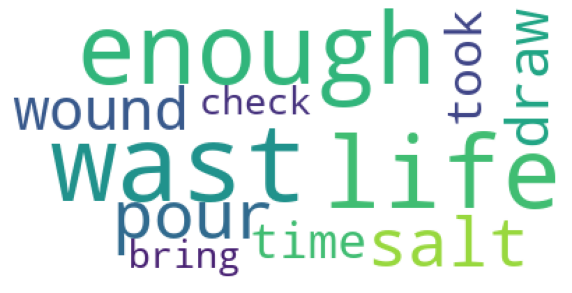

In [389]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(review)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='hanning')
plt.axis("off")
plt.savefig('/Users/hernantrujillo/Documents/Metis/NBM_Unsupervised_Student-main/charts/word_cloud.png')

Tokenization

In [542]:
#Tokenization is the process of taking all words of the review and making them one column for each word

#max_features is used to remove non relavent words
cv = CountVectorizer(max_features = 1500)

#Spars metrics in NLP
X = cv.fit_transform(corpus)
y = df.iloc[:,1].values

In [543]:
token = pd.DataFrame(X.toarray(), index=corpus, columns=cv.get_feature_names())
token.head()

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,year,yellow,yellowtail,yelper,yet,yucki,yukon,yum,yummi,zero
wow love place,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
crust good,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tasti textur nasti,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
stop late may bank holiday rick steve recommend love,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
select menu great price,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [538]:
X

<1000x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 5307 stored elements in Compressed Sparse Row format>

In [544]:
token.columns

Index(['absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'accordingli',
       'account', 'ach', 'acknowledg', 'across',
       ...
       'year', 'yellow', 'yellowtail', 'yelper', 'yet', 'yucki', 'yukon',
       'yum', 'yummi', 'zero'],
      dtype='object', length=1500)

In [545]:
token.shape

(1000, 1500)

In [546]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [749]:
from nltk import FreqDist

def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

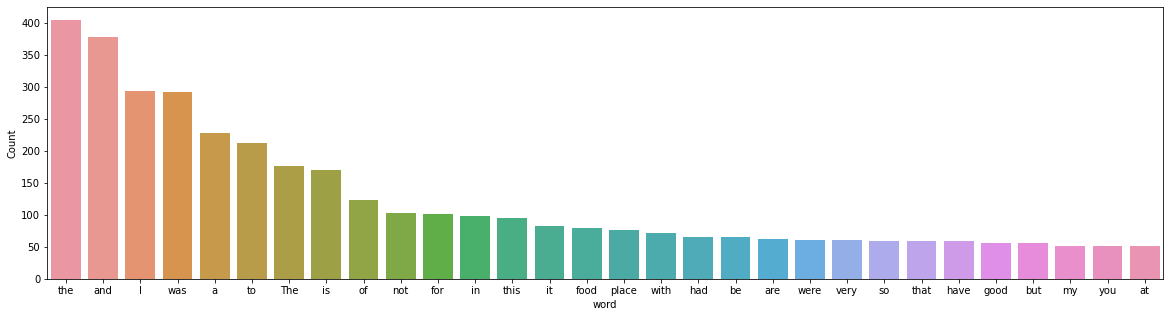

In [750]:
freq_words(df['Review'])

### 30 Topics

In [597]:
nmf_model = NMF(30)
doc_topic = nmf_model.fit_transform(X)
doc_topic

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


array([[0.        , 0.26148333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.29344004, ..., 0.        , 0.00648073,
        0.        ],
       [0.00249311, 0.        , 0.00587982, ..., 0.        , 0.00040752,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00053807, 0.01160772, 0.00156371, ..., 0.        , 0.        ,
        0.00855667],
       [0.00445637, 0.00040277, 0.        , ..., 0.        , 0.00073724,
        0.        ]])

In [606]:
#topic_matrix_df = topic_matrix_df.reset_index()
#topic_matrix_df.head()

ValueError: cannot insert level_0, already exists

In [599]:
final_topic_matrix_all_df = topic_matrix_df.merge(df, left_index=True, right_index=True)
final_topic_matrix_all_df.head()

,level_0,index,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,Review,Liked
0,0,wow love place,0.000000,0.098874,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.002525,0.0,0.000000,0.0,Wow... Loved this place.,1
1,1,crust good,0.000000,0.000000,0.132903,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.011859,0.000000,0.0,0.000000,0.0,Crust is not good.,0
2,2,tasti textur nasti,0.001148,0.000000,0.003103,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.002186,0.0,0.001118,0.004544,0.0,0.021171,0.0,Not tasty and the texture was just nasty.,0
3,3,stop late may bank holiday rick steve recommen...,0.000000,0.003919,0.000000,0.000524,0.0,0.000000,0.0,0.0,...,0.001468,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,Stopped by during the late May bank holiday of...,1
4,4,select menu great price,0.000000,0.000000,0.011412,0.000000,0.0,0.131895,0.0,0.0,...,0.004560,0.001714,0.0,0.000000,0.000000,0.0,0.006368,0.0,The selection on the menu was great and so wer...,1


In [600]:
topic_matrix = nmf_model.transform(corpus_word_matrix)
word_topic_matrix_df = pd.DataFrame(nmf_model.components_ , columns = vocab).T.add_prefix('topic_')
word_topic_matrix_df

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
absolut,0.0,0.00000,0.000000,0.037424,0.000000,0.000000,0.009463,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.381051,0.000000,0.000000,0.007532,0.034591,0.123242
absolutley,0.0,0.00000,0.000000,0.000000,0.000876,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001025
accid,0.0,0.03056,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000705,0.000000,0.000000,0.001685,0.000000,0.000000,0.000000,0.000000
accommod,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000379,0.000000,0.000000,0.000000,0.000000,0.000000,0.001097,0.000000,0.000000
accomod,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yucki,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.009013,0.000000,0.003816,0.0,...,0.0,0.007187,0.000000,0.000000,0.000000,0.000000,0.012616,0.000000,0.000199,0.000000
yukon,0.0,0.00000,0.000331,0.000000,0.000000,0.001677,0.000000,0.000085,0.000000,0.0,...,0.0,0.001922,0.000000,0.005531,0.003867,0.000000,0.000000,0.000000,0.000000,0.000000
yum,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
yummi,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.088924,0.000000,0.000000,0.072659,0.000000,0.000000,0.000000,0.000000


In [353]:
#topic_word = pd.DataFrame(nmf_model.components_.round(3),
             #index = ["component_1", "component_2", "component_3", "component_4", "component_5", "component_6", "component_7", "component_8", "component_9", "component_10", "component_11", "component_12", "component_13", "component_14", "component_15", "component_16", "component_17", "component_18", "component_19", "component_20", "component_21", "component_22", "component_23", "component_24", "component_25", "component_26", "component_27", "component_28", "component_29", "component_30"],
             #columns = cv.get_feature_names())
#topic_word

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,year,yellow,yellowtail,yelper,yet,yucki,yukon,yum,yummi,zero
component_1,0.000,0.000,0.000,0.000,0.000,0.034,0.00,0.000,0.015,0.000,...,0.000,0.000,0.000,0.000,0.063,0.000,0.000,0.000,0.000,0.000
component_2,0.000,0.000,0.031,0.000,0.000,0.000,0.00,0.000,0.000,0.000,...,0.044,0.000,0.000,0.025,0.011,0.000,0.000,0.000,0.000,0.000
component_3,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,...,0.013,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_4,0.039,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_5,0.000,0.001,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_6,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.000,0.000
component_7,0.033,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,...,0.060,0.000,0.000,0.000,0.053,0.008,0.000,0.000,0.000,0.000
component_8,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.001,0.000,0.000,...,0.028,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_9,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.073,0.000,...,0.000,0.000,0.000,0.000,0.000,0.004,0.000,0.000,0.000,0.000
component_10,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.008,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [604]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [605]:
display_topics(nmf_model, cv.get_feature_names(), 5)


Topic  0
food, bad, qualiti, enjoy, mediocr

Topic  1
place, want, night, sushi, recommend

Topic  2
good, select, price, pizza, pretti

Topic  3
back, come, definit, soon, probabl

Topic  4
servic, slow, custom, excel, terribl

Topic  5
great, menu, side, wine, alway

Topic  6
time, first, wast, vega, last

Topic  7
like, feel, look, warm, felt

Topic  8
wait, minut, hour, want, end

Topic  9
steak, best, ever, worst, eaten

Topic  10
realli, owner, enjoy, sandwich, quit

Topic  11
friendli, staff, even, alway, super

Topic  12
go, wrong, even, think, marrow

Topic  13
sauc, said, anoth, yum, well

Topic  14
also, tast, amaz, say, ever

Topic  15
would, recommend, well, made, definit

Topic  16
love, pizza, tri, marrow, pasta

Topic  17
delici, even, deal, spici, enough

Topic  18
get, minut, took, drink, say

Topic  19
never, ever, mani, got, worst

Topic  20
one, definit, make, better, custom

Topic  21
disappoint, experi, much, bit, went

Topic  22
order, minut, got, anoth, arriv


In [607]:
word_topic_matrix_df.sort_values(by='topic_0', ascending=False).head(10) #food quality

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
food,5.666425,0.000000,0.009118,0.000000,0.000000,0.009804,0.000000,0.000000,0.004240,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002943,0.000000,0.006802,0.000395,0.000000
bad,0.404148,0.009939,0.000000,0.000000,0.086404,0.000000,0.190677,0.042807,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.089125,0.000000,0.083365,0.034263,0.000000,0.000000
qualiti,0.178330,0.009535,0.000000,0.000000,0.054635,0.073837,0.017683,0.000000,0.000000,0.000000,...,0.000000,0.081777,0.000000,0.342426,0.000000,0.000000,0.000000,0.000000,0.000000,0.342596
enjoy,0.139903,0.000000,0.010337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032301,...,0.088068,0.000000,0.000000,0.039624,0.000000,0.046613,0.000000,0.000000,0.034115,0.000000
mediocr,0.139623,0.050742,0.000000,0.000000,0.053671,0.000000,0.000000,0.000000,0.043929,0.028798,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
arriv,0.130316,0.011690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035982,0.000000,...,0.051384,0.000000,0.349958,0.000000,0.000000,0.003378,0.000000,0.000000,0.000000,0.000000
connoisseur,0.126214,0.000000,0.010120,0.000693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
far,0.125742,0.000000,0.035193,0.000000,0.000000,0.000000,0.037262,0.000000,0.000000,0.105113,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.079499
definit,0.116504,0.000000,0.000000,0.312663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.600550,0.000000,0.000000,0.081937,0.000000,0.000000,0.000000,0.000000,0.000000,0.151586
bar,0.112349,0.000000,0.000000,0.000000,0.000000,0.061380,0.000000,0.093705,0.000000,0.121532,...,0.285983,0.000000,0.000000,0.000000,0.000000,0.000000,0.115333,0.000000,0.000000,0.000000


In [608]:
for review in final_topic_matrix_all_df.sort_values(by='topic_0', ascending=False).head(10)['Review'].values:
    print(review)
    print()

The food is good.

The food wasn't good.

The food was very good.

Great food.

Food was delicious!

The food is very good for your typical bar food.

The food, amazing.

I am far from a sushi connoisseur but I can definitely tell the difference between good food and bad food and this was certainly bad food.

Great service and food.

The food was terrible.



In [609]:
word_topic_matrix_df.sort_values(by='topic_1', ascending=False).head(10) #approval

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
place,0.000000,3.676794,0.000000,0.000000,0.000000,0.000000,0.000000,0.001625,0.000000,0.030618,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
want,0.024897,0.172920,0.012873,0.000000,0.050665,0.000000,0.000000,0.045768,0.306955,0.000000,...,0.043203,0.000000,0.000000,0.0000,0.093952,0.0,0.000000,0.000000,0.025593,0.000000
night,0.000000,0.162619,0.036781,0.040336,0.000000,0.017298,0.089764,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000503,0.000000
sushi,0.101466,0.158674,0.054897,0.009782,0.031142,0.039340,0.034689,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0056,0.000000,0.0,0.000000,0.000000,0.001034,0.095109
recommend,0.000000,0.144238,0.000000,0.007049,0.007858,0.007618,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.041959,0.071825,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
tribut,0.000000,0.115631,0.053618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
hope,0.000000,0.115080,0.014034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.101668,0.0,0.000000,0.000000,0.000000,0.000317
overpr,0.058331,0.111437,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
area,0.000000,0.090935,0.000000,0.000000,0.000000,0.098637,0.000000,0.000000,0.000000,0.120340,...,0.085538,0.000000,0.000000,0.0000,0.000000,0.0,0.330821,0.000000,0.088602,0.000000
event,0.000000,0.087415,0.023182,0.000000,0.000000,0.030214,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.004291,0.000000,0.000000


In [610]:
for review in final_topic_matrix_all_df.sort_values(by='topic_1', ascending=False).head(10)['Review'].values:
    print(review)
    print()

This place has it!

this place is good.

This place is great!!!!!!!!!!!!!!

I love this place.

We loved the place.

I love this place.

This place is amazing!

I really do recommend this place, you can go wrong with this donut place!

I *heart* this place.

This is a GREAT place to eat!



In [613]:
word_topic_matrix_df.sort_values(by='topic_2', ascending=False).head(10) #food quality

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
good,0.000000,0.000000,3.309640,0.000000,0.001412,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
select,0.065939,0.000000,0.267663,0.000000,0.000000,0.056181,0.000000,0.000000,0.000000,0.036846,...,0.000000,0.000000,0.000000,0.108662,0.012600,0.000000,0.000000,0.000000,0.000000,0.000000
price,0.050739,0.000000,0.200982,0.097666,0.113021,0.081735,0.000000,0.000000,0.000000,0.004527,...,0.000000,0.000000,0.000000,0.000000,0.074811,0.000000,0.000000,0.000000,0.000000,0.000000
pizza,0.000000,0.000000,0.158554,0.000000,0.000424,0.096776,0.000000,0.000000,0.061812,0.000000,...,0.000000,0.000000,0.122861,0.000000,0.000000,0.077809,0.116081,0.000000,0.000000,0.021726
pretti,0.000000,0.027490,0.111847,0.000000,0.035744,0.000000,0.019382,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.007016,0.000000,0.121480,0.000000,0.253958,0.141353
way,0.017237,0.082991,0.102930,0.099982,0.000000,0.045823,0.000000,0.006170,0.000000,0.000000,...,0.118524,0.044692,0.043702,0.000000,0.155033,0.000000,0.000000,0.018705,0.000000,0.000000
real,0.000000,0.000000,0.095614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.077411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
beer,0.006258,0.030541,0.091659,0.000000,0.000000,0.063313,0.000000,0.092089,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.094824,0.000000,0.000000,0.005985,0.000000,0.000000
could,0.000000,0.021384,0.087047,0.000000,0.001840,0.000000,0.199047,0.094663,0.031810,0.000000,...,0.127689,0.000000,0.135390,0.000000,0.000000,0.020734,0.000000,0.056813,0.042528,0.000000
thing,0.000000,0.023534,0.086261,0.000000,0.000000,0.000000,0.000000,0.087628,0.000000,0.025573,...,0.098412,0.000000,0.155147,0.000000,0.000000,0.000000,0.095577,0.000000,0.000000,0.076308


In [614]:
for review in final_topic_matrix_all_df.sort_values(by='topic_2', ascending=False).head(10)['Review'].values:
    print(review)
    print()

It was not good.

Food was good, service was good, Prices were good.

Good food , good service .

The food is good.

The food wasn't good.

The food was very good.

this place is good.

A good time!

Good prices.

I did not expect this to be so good!



In [615]:
word_topic_matrix_df.sort_values(by='topic_3', ascending=False).head(10) #fidelity

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
back,0.000000,0.000000,0.000000,3.470408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
come,0.000000,0.000000,0.030480,0.560105,0.000000,0.010728,0.083362,0.007682,0.131340,0.000000,...,0.051747,0.000000,0.006770,0.000000,0.000000,0.00000,0.031170,0.000000,0.000000,0.260569
definit,0.116504,0.000000,0.000000,0.312663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.600550,0.000000,0.000000,0.081937,0.000000,0.00000,0.000000,0.000000,0.000000,0.151586
soon,0.095785,0.000000,0.000000,0.296598,0.000000,0.000000,0.135392,0.000000,0.041933,0.000000,...,0.000000,0.000000,0.000000,0.001232,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
probabl,0.000000,0.000000,0.000000,0.215401,0.000000,0.000000,0.000000,0.018781,0.000000,0.005316,...,0.050204,0.000000,0.299365,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
anytim,0.066031,0.000000,0.000000,0.215198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
everi,0.000000,0.030007,0.083107,0.178131,0.000000,0.018895,0.157491,0.031902,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.07666,0.000000,0.000000,0.039989,0.009517
think,0.009549,0.053510,0.000000,0.148582,0.003049,0.013171,0.236368,0.003880,0.000000,0.000000,...,0.000000,0.000000,0.091474,0.000000,0.060458,0.00000,0.000000,0.002703,0.000000,0.019053
went,0.000000,0.000000,0.010334,0.136506,0.014082,0.024176,0.271405,0.000000,0.000000,0.000000,...,0.093544,0.227997,0.000000,0.000000,0.010435,0.00000,0.003523,0.000000,0.000000,0.000000
tri,0.038331,0.020101,0.000000,0.129002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.093747,0.000000,0.381677,0.000000,0.00000,0.000000,0.000000,0.133754,0.024975


In [616]:
for review in final_topic_matrix_all_df.sort_values(by='topic_3', ascending=False).head(10)['Review'].values:
    print(review)
    print()

Will not be back!

I won't be back.

Will not be back.

I won't be back.

Will be back again!

We will not be coming back.

We won't be going back.

Won't go back.

will definitely be back!

definitely will come back here again.



In [617]:
word_topic_matrix_df.sort_values(by='topic_4', ascending=False).head(10) #service

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
servic,0.000000,0.000000,0.008230,0.000000,3.433748,0.009287,0.000000,0.007765,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
slow,0.006282,0.000000,0.000000,0.000000,0.390194,0.000000,0.000000,0.000000,0.000000,0.028077,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.057937,0.000000,0.000000,0.007611
custom,0.000000,0.000000,0.000000,0.024731,0.245134,0.000000,0.006148,0.000000,0.000000,0.007229,...,0.299575,0.000000,0.178145,0.000000,0.000000,0.000000,0.038543,0.091485,0.000000,0.000000
excel,0.000000,0.000000,0.000000,0.022180,0.186916,0.000000,0.031280,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.082058,0.000000,0.000000,0.086266,0.000000,0.000000,0.000000,0.178230
terribl,0.111557,0.010813,0.000000,0.000000,0.143342,0.000000,0.000000,0.000000,0.045552,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
friendli,0.000000,0.000000,0.000000,0.000000,0.115493,0.000000,0.000000,0.000000,0.000000,0.008401,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
price,0.050739,0.000000,0.200982,0.097666,0.113021,0.081735,0.000000,0.000000,0.000000,0.004527,...,0.000000,0.000000,0.000000,0.000000,0.074811,0.000000,0.000000,0.000000,0.000000,0.000000
receiv,0.000000,0.047388,0.000000,0.030315,0.111182,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.002566,0.008452,0.000000,0.000000,0.000000,0.034459,0.058722
better,0.000000,0.061712,0.027578,0.000000,0.108740,0.000000,0.013777,0.011434,0.041990,0.000000,...,0.330466,0.016428,0.000000,0.083259,0.000000,0.000000,0.000000,0.047068,0.000000,0.051183
fantast,0.000000,0.000000,0.000000,0.000000,0.107653,0.000000,0.030321,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058855


In [618]:
for review in final_topic_matrix_all_df.sort_values(by='topic_4', ascending=False).head(10)['Review'].values:
    print(review)
    print()

The service here is fair at best.

Great service and food.

Fantastic service here.

Service was fantastic.

Terrible service!

Very poor service.

Service sucks.

Worst food/service I've had in a while.

Awesome service and food.

Service was slow and not attentive.



In [619]:
word_topic_matrix_df.sort_values(by='topic_5', ascending=False).head(10) #food quality

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
great,0.000000,0.000000,0.000000,0.0,0.000000,3.080288,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
menu,0.000000,0.000000,0.000000,0.0,0.009674,0.191079,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.069468,0.194276,0.000000,0.0,0.000000,0.075027,0.000000,0.000000,0.099518
side,0.000000,0.000000,0.081265,0.0,0.000000,0.146761,0.025703,0.000000,0.000000,0.011676,...,0.000000,0.000000,0.000000,0.025371,0.0,0.000000,0.000000,0.038119,0.024304,0.045723
wine,0.000000,0.000000,0.000000,0.0,0.000000,0.143249,0.122251,0.000000,0.000000,0.018849,...,0.107481,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.029434,0.000000,0.000000
alway,0.009666,0.000000,0.000000,0.0,0.000000,0.117175,0.113851,0.000000,0.012370,0.000000,...,0.000000,0.000000,0.092123,0.000000,0.0,0.044215,0.000000,0.011683,0.000000,0.078655
dessert,0.000000,0.000000,0.000000,0.0,0.000000,0.114216,0.000000,0.045529,0.000000,0.026864,...,0.000000,0.097397,0.079336,0.015298,0.0,0.011816,0.000000,0.000000,0.000000,0.000000
drink,0.000000,0.000000,0.044679,0.0,0.000000,0.112998,0.000000,0.000000,0.039278,0.020540,...,0.075609,0.000000,0.000000,0.000000,0.0,0.000000,0.136107,0.000000,0.003615,0.000000
set,0.000000,0.000000,0.000000,0.0,0.041688,0.100427,0.000000,0.052996,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.038909,0.000000,0.000000,0.000000,0.081283
area,0.000000,0.090935,0.000000,0.0,0.000000,0.098637,0.000000,0.000000,0.000000,0.120340,...,0.085538,0.000000,0.000000,0.000000,0.0,0.000000,0.330821,0.000000,0.088602,0.000000
pizza,0.000000,0.000000,0.158554,0.0,0.000424,0.096776,0.000000,0.000000,0.061812,0.000000,...,0.000000,0.000000,0.122861,0.000000,0.0,0.077809,0.116081,0.000000,0.000000,0.021726


In [620]:
for review in final_topic_matrix_all_df.sort_values(by='topic_5', ascending=False).head(10)['Review'].values:
    print(review)
    print()

Both great!

Great food.

This place is great!!!!!!!!!!!!!!

Great steak, great sides, great wine, amazing desserts.

The staff are great, the ambiance is great.

A great way to finish a great.

Good value, great food, great service.

Great service and food.

Nargile - I think you are great.

Great food and great service in a clean and friendly setting.



In [621]:
word_topic_matrix_df.sort_values(by='topic_6', ascending=False).head(10) #fidelity

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
time,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.007020,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
first,0.000000,0.000000,0.000000,0.000000,0.022893,0.000000,0.669492,0.000000,0.072395,0.000000,...,0.000000,0.158436,0.004866,0.000000,0.000000,0.000000,0.031493,0.000000,0.00000,0.000000
wast,0.098639,0.001241,0.002892,0.000000,0.000000,0.000000,0.350860,0.031993,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.011714,0.000000,0.000000,0.000000,0.03794,0.000000
vega,0.024700,0.057448,0.000000,0.060837,0.021369,0.000000,0.325377,0.000000,0.000000,0.201503,...,0.000000,0.147056,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.444267
last,0.000000,0.075437,0.017408,0.000000,0.000000,0.000000,0.283974,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.008494,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
went,0.000000,0.000000,0.010334,0.136506,0.014082,0.024176,0.271405,0.000000,0.000000,0.000000,...,0.093544,0.227997,0.000000,0.000000,0.010435,0.000000,0.003523,0.000000,0.00000,0.000000
next,0.000000,0.030970,0.000000,0.058638,0.042511,0.000000,0.265130,0.000000,0.014634,0.040928,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.124141,0.057243,0.000000,0.00000,0.097932
multipl,0.008186,0.000000,0.000000,0.000000,0.000000,0.000000,0.253281,0.000000,0.000000,0.000000,...,0.093361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
think,0.009549,0.053510,0.000000,0.148582,0.003049,0.013171,0.236368,0.003880,0.000000,0.000000,...,0.000000,0.000000,0.091474,0.000000,0.060458,0.000000,0.000000,0.002703,0.00000,0.019053
experi,0.000000,0.000000,0.028211,0.000000,0.000000,0.094651,0.202695,0.008812,0.000000,0.009052,...,0.018545,0.630366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [622]:
for review in final_topic_matrix_all_df.sort_values(by='topic_6', ascending=False).head(10)['Review'].values:
    print(review)
    print()

A good time!

I have eaten here multiple times, and each time the food was delicious.

Don't waste your time here.

This was my first time and I can't wait until the next.

I asked multiple times for the wine list and after some time of being ignored I went to the hostess and got one myself.

TOTAL WASTE OF TIME.

first time there and might just be the last.

The last 3 times I had lunch here has been bad.

2 times - Very Bad Customer Service !

Horrible - don't waste your time and money.



In [623]:
word_topic_matrix_df.sort_values(by='topic_7', ascending=False).head(10) #approval

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
like,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.848890,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
feel,0.000000,0.000000,0.000000,0.000000,0.041551,0.000000,0.000000,0.502831,0.000000,0.043907,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.233175,0.053760,0.000000,0.000749,0.165698
look,0.087741,0.009118,0.062455,0.008231,0.000000,0.000000,0.002452,0.201447,0.000000,0.000000,...,0.000000,0.102600,0.000000,0.000000,0.000000,0.044882,0.101902,0.050171,0.000000,0.000000
warm,0.035906,0.000000,0.000000,0.000000,0.001853,0.000000,0.000000,0.177127,0.000000,0.114012,...,0.000000,0.000000,0.066334,0.000000,0.000000,0.021476,0.000000,0.000000,0.000000,0.070230
felt,0.000000,0.000000,0.000000,0.000000,0.017021,0.000000,0.000000,0.172101,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018851,0.021696,0.000000,0.000000
made,0.000000,0.000979,0.028474,0.000000,0.022645,0.055794,0.065752,0.161462,0.000000,0.001385,...,0.049372,0.088600,0.000000,0.081338,0.035151,0.143105,0.000000,0.000000,0.000000,0.000000
parti,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.154736,0.050428,0.000000,...,0.092885,0.000000,0.000000,0.000000,0.000000,0.000000,0.081120,0.000000,0.000000,0.000000
quick,0.000000,0.000974,0.010339,0.000000,0.068215,0.000000,0.000000,0.138150,0.000000,0.000000,...,0.000000,0.000000,0.038294,0.000000,0.000000,0.000000,0.148219,0.000000,0.000000,0.000000
much,0.000000,0.055680,0.031748,0.000000,0.078177,0.000000,0.005239,0.134662,0.000000,0.000000,...,0.000000,0.313845,0.000000,0.000000,0.155533,0.000000,0.000000,0.000000,0.000000,0.051924
dark,0.000000,0.000000,0.000000,0.000000,0.000000,0.000590,0.000000,0.109264,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.001474,0.000000,0.000000,0.000000,0.000000,0.000000


In [624]:
for review in final_topic_matrix_all_df.sort_values(by='topic_7', ascending=False).head(10)['Review'].values:
    print(review)
    print()

did not like at all.

But I don't like it.

I like Steiners because it's dark and it feels like a bar.

Service is quick and even "to go" orders are just like we like it!

Overall, I like there food and the service.

Tasted like dirt.

Overall, I like this place a lot.

This was like the final blow!

This place is like Chipotle, but BETTER.

I know this is not like the other restaurants at all, something is very off here!



In [625]:
word_topic_matrix_df.sort_values(by='topic_8', ascending=False).head(10) #Service (waiting time)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
wait,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.721415,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000001,0.000000
minut,0.034318,0.000000,0.000000,0.0,0.000000,0.000000,0.019756,0.000000,0.701263,0.000000,...,0.100304,0.000000,0.982792,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
hour,0.032693,0.000000,0.000000,0.0,0.000000,0.023299,0.000000,0.026207,0.398331,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.161440,0.000000,0.0,0.000000,0.064055
want,0.024897,0.172920,0.012873,0.0,0.050665,0.000000,0.000000,0.045768,0.306955,0.000000,...,0.043203,0.000000,0.000000,0.000000,0.093952,0.000000,0.000000,0.0,0.025593,0.000000
end,0.026390,0.010282,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.273880,0.000000,...,0.000000,0.000000,0.109902,0.000000,0.000000,0.000000,0.107505,0.0,0.000000,0.000000
around,0.030790,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.068972,0.238913,0.000000,...,0.000000,0.000000,0.067842,0.087957,0.000000,0.278817,0.000000,0.0,0.000000,0.064816
seat,0.000000,0.000000,0.000000,0.0,0.000000,0.032396,0.000000,0.000000,0.211139,0.050431,...,0.000000,0.001089,0.000000,0.000000,0.000000,0.050074,0.176810,0.0,0.000000,0.000000
half,0.003072,0.013744,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.204038,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003016,0.000000,0.0,0.000000,0.000000
drive,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.199764,0.000000,...,0.100434,0.082216,0.000000,0.000000,0.000000,0.000593,0.000000,0.0,0.000000,0.000000
mean,0.001708,0.014642,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.197183,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002541,0.000000,0.0,0.000000,0.000000


In [626]:
for review in final_topic_matrix_all_df.sort_values(by='topic_8', ascending=False).head(10)['Review'].values:
    print(review)
    print()

Waited and waited and waited.

I waited and waited.

a drive thru means you do not want to wait around for half an hour for your food, but somehow when we end up going here they make us wait and wait.

We waited for thirty minutes to be seated (although there were 8 vacant tables and we were the only folks waiting).

After 20 minutes wait, I got a table.

I can't wait to go back.

This was my first time and I can't wait until the next.

After waiting an hour and being seated, I was not in the greatest of moods.

For about 10 minutes, we we're waiting for her salad when we realized that it wasn't coming any time soon.

We waited for forty five minutes in vain.



In [627]:
word_topic_matrix_df.sort_values(by='topic_9', ascending=False).head(10) #steak

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
steak,0.000000,0.000000,0.000000,0.000000,0.000000,0.045618,0.001761,0.000000,0.000000,2.452189,...,0.000000,0.000000,0.00000,0.000000,0.043060,0.000000,0.000000,0.000000,0.000000,0.000000
best,0.048763,0.000000,0.000000,0.000000,0.065036,0.000000,0.000000,0.000000,0.000000,2.381134,...,0.109724,0.000000,0.03405,0.000000,0.000000,0.000000,0.064272,0.003690,0.000000,0.010984
ever,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009731,0.000000,0.000000,0.963226,...,0.001298,0.000000,0.00000,0.124772,0.000000,0.000000,0.000000,0.045209,0.078083,0.023995
worst,0.052785,0.000000,0.000000,0.000000,0.039457,0.000000,0.000000,0.000000,0.000000,0.564497,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.085465,0.036885,0.000000
eaten,0.068810,0.008986,0.000000,0.000000,0.000000,0.000000,0.092635,0.022467,0.000000,0.383743,...,0.000000,0.000000,0.00000,0.163632,0.000000,0.000000,0.000000,0.014950,0.000000,0.000000
guy,0.002531,0.000000,0.000000,0.000000,0.000000,0.012001,0.000000,0.000000,0.000284,0.368306,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.046796,0.000000,0.000000,0.124948,0.000000
son,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.357327,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
said,0.000000,0.008834,0.000000,0.000000,0.000000,0.000000,0.000000,0.006471,0.000000,0.325254,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040136,0.000000
cook,0.000000,0.000000,0.001972,0.000000,0.069342,0.004856,0.000000,0.000000,0.000000,0.216696,...,0.000000,0.000000,0.00000,0.000000,0.305671,0.000000,0.000000,0.020961,0.000000,0.000000
vega,0.024700,0.057448,0.000000,0.060837,0.021369,0.000000,0.325377,0.000000,0.000000,0.201503,...,0.000000,0.147056,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.444267


In [628]:
for review in final_topic_matrix_all_df.sort_values(by='topic_9', ascending=False).head(10)['Review'].values:
    print(review)
    print()

The guys all had steaks, and our steak loving son who has had steak at the best and worst places said it was the best steak he's ever eaten.

The steak and the shrimp are in my opinion the best entrees at GC.

The service here is fair at best.

Their steaks are 100% recommended!

Classy/warm atmosphere, fun and fresh appetizers, succulent steaks (Baseball steak!!!!!

The steak was amazing...rge fillet relleno was the best seafood plate i have ever had!

Damn good steak.

The selection of food was not the best.

Best breakfast buffet!!!

Food was average at best.



### 10 Topics

In [629]:
nmf_model = NMF(10)
doc_topic = nmf_model.fit_transform(X)
doc_topic

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


array([[0.        , 0.31098602, 0.        , ..., 0.        , 0.        ,
        0.07662169],
       [0.        , 0.        , 0.30463646, ..., 0.        , 0.        ,
        0.        ],
       [0.00424894, 0.00052845, 0.00824677, ..., 0.        , 0.        ,
        0.00580138],
       ...,
       [0.        , 0.02436194, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01584393, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00617168, 0.        , 0.        , ..., 0.        , 0.0150937 ,
        0.        ]])

In [630]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1", "component_2", "component_3", "component_4", "component_5", "component_6", "component_7", "component_8", "component_9", "component_10"],
             columns = cv.get_feature_names())
topic_word

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,year,yellow,yellowtail,yelper,yet,yucki,yukon,yum,yummi,zero
component_1,0.034,0.000,0.000,0.000,0.000,0.033,0.000,0.000,0.014,0.000,...,0.000,0.000,0.000,0.000,0.059,0.000,0.000,0.000,0.000,0.000
component_2,0.000,0.000,0.025,0.000,0.000,0.000,0.001,0.000,0.000,0.000,...,0.044,0.000,0.000,0.026,0.017,0.000,0.000,0.000,0.001,0.007
component_3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.022,0.000,0.001,0.000,0.000,0.000,0.001,0.000,0.000,0.000
component_4,0.015,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,...,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.009
component_5,0.000,0.001,0.000,0.000,0.004,0.000,0.000,0.001,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_6,0.000,0.000,0.000,0.003,0.002,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.001,0.000
component_7,0.065,0.000,0.000,0.003,0.002,0.000,0.000,0.000,0.000,0.000,...,0.060,0.000,0.000,0.000,0.036,0.009,0.000,0.000,0.000,0.001
component_8,0.001,0.000,0.000,0.007,0.000,0.001,0.002,0.002,0.000,0.000,...,0.044,0.002,0.002,0.000,0.000,0.000,0.001,0.000,0.005,0.011
component_9,0.000,0.000,0.000,0.000,0.001,0.000,0.007,0.001,0.111,0.001,...,0.000,0.000,0.000,0.000,0.021,0.002,0.000,0.032,0.013,0.005
component_10,0.019,0.000,0.000,0.012,0.000,0.000,0.000,0.001,0.000,0.023,...,0.000,0.006,0.002,0.000,0.048,0.000,0.000,0.093,0.014,0.012


In [631]:
display_topics(nmf_model, cv.get_feature_names(), 5)


Topic  0
food, bad, delici, qualiti, definit

Topic  1
place, would, recommend, eat, want

Topic  2
good, realli, select, price, pizza

Topic  3
back, go, never, come, would

Topic  4
servic, slow, friendli, custom, nice

Topic  5
great, menu, staff, friendli, alway

Topic  6
time, first, vega, came, wast

Topic  7
like, feel, order, also, tast

Topic  8
wait, minut, get, us, anoth

Topic  9
steak, best, ever, love, worst


In [632]:
topic_matrix = nmf_model.transform(corpus_word_matrix)
word_topic_matrix_df = pd.DataFrame(nmf_model.components_ , columns = vocab).T.add_prefix('topic_')
word_topic_matrix_df

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
absolut,0.033649,0.000000,0.000000,0.014813,0.000000,0.000000,0.064543,0.001400,0.000000,0.019024
absolutley,0.000000,0.000000,0.000000,0.000283,0.001110,0.000000,0.000362,0.000000,0.000006,0.000000
accid,0.000000,0.025062,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
accommod,0.000000,0.000000,0.000000,0.000000,0.000000,0.002884,0.002511,0.006746,0.000000,0.011988
accomod,0.000000,0.000000,0.000000,0.000183,0.003692,0.002265,0.001970,0.000000,0.000709,0.000000
...,...,...,...,...,...,...,...,...,...,...
yucki,0.000000,0.000000,0.000000,0.000000,0.000000,0.000024,0.008914,0.000002,0.002113,0.000219
yukon,0.000000,0.000000,0.000958,0.000000,0.000000,0.002147,0.000015,0.000624,0.000000,0.000000
yum,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032136,0.092887
yummi,0.000000,0.001148,0.000000,0.002546,0.000000,0.000691,0.000000,0.004690,0.013017,0.013637


In [633]:
word_topic_matrix_df.sort_values(by='topic_0', ascending=False).head(5) #food quality

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
food,4.780679,0.000000,0.016709,0.000000,0.008544,0.009411,0.000000,0.000000,0.0,0.000000
bad,0.353609,0.017159,0.000000,0.000000,0.084078,0.000000,0.127042,0.048743,0.0,0.000000
delici,0.304422,0.000000,0.000000,0.000000,0.000000,0.000000,0.196206,0.000000,0.0,0.043690
qualiti,0.179401,0.035710,0.000000,0.000000,0.077606,0.077999,0.041371,0.000000,0.0,0.000000
definit,0.141129,0.007783,0.000000,0.183749,0.000000,0.000000,0.034628,0.000000,0.0,0.032322


In [634]:
for review in final_topic_matrix_all_df.sort_values(by='topic_0', ascending=False).head(10)['Review'].values:
    print(review)
    print()

The food is good.

The food wasn't good.

The food was very good.

Great food.

Food was delicious!

The food is very good for your typical bar food.

The food, amazing.

I am far from a sushi connoisseur but I can definitely tell the difference between good food and bad food and this was certainly bad food.

Great service and food.

The food was terrible.



In [635]:
word_topic_matrix_df.sort_values(by='topic_1', ascending=False).head(5) #approval

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
place,0.000000,3.100864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
would,0.000000,0.285131,0.000000,0.287985,0.000000,0.000000,0.000000,0.000000,0.00000,0.006157
recommend,0.000000,0.230648,0.000000,0.116040,0.012770,0.008487,0.000000,0.000000,0.00000,0.011071
eat,0.014950,0.228479,0.031266,0.033004,0.000000,0.136139,0.076128,0.067387,0.03228,0.018694
want,0.059827,0.184537,0.027327,0.000000,0.037397,0.000000,0.000000,0.041563,0.23163,0.005590


In [636]:
for review in final_topic_matrix_all_df.sort_values(by='topic_1', ascending=False).head(10)['Review'].values:
    print(review)
    print()

This place has it!

this place is good.

This place is great!!!!!!!!!!!!!!

I love this place.

We loved the place.

I love this place.

This place is amazing!

I really do recommend this place, you can go wrong with this donut place!

I *heart* this place.

This is a GREAT place to eat!



In [640]:
word_topic_matrix_df.sort_values(by='topic_2', ascending=False).head(5) #approval

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
good,0.000000,0.000000,3.103883,0.000000,0.008294,0.000000,0.000000,0.000000,0.000000,0.000000
realli,0.000000,0.163740,0.354051,0.000000,0.000000,0.020809,0.173432,0.163959,0.000000,0.162024
select,0.079207,0.000000,0.253004,0.000000,0.000000,0.055814,0.000000,0.000000,0.000000,0.015171
price,0.050435,0.027109,0.225695,0.035758,0.104354,0.082748,0.000000,0.000000,0.000000,0.028631
pizza,0.000000,0.000000,0.158780,0.000000,0.018878,0.120304,0.000000,0.000000,0.142464,0.101789


In [638]:
for review in final_topic_matrix_all_df.sort_values(by='topic_2', ascending=False).head(10)['Review'].values:
    print(review)
    print()

It was not good.

Food was good, service was good, Prices were good.

Good food , good service .

The food is good.

The food wasn't good.

The food was very good.

this place is good.

A good time!

Good prices.

I did not expect this to be so good!



In [641]:
word_topic_matrix_df.sort_values(by='topic_3', ascending=False).head(5) #fidelity

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
back,0.000000,0.000000,0.000000,2.304851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
go,0.048882,0.060199,0.000000,2.166842,0.000000,0.000000,0.000000,0.033659,0.081571,0.000000
never,0.034968,0.081919,0.000000,0.550367,0.000000,0.012391,0.000000,0.035377,0.086449,0.098392
come,0.000000,0.017296,0.041693,0.289019,0.009731,0.022823,0.082195,0.006408,0.110525,0.000000
would,0.000000,0.285131,0.000000,0.287985,0.000000,0.000000,0.000000,0.000000,0.000000,0.006157


In [642]:
for review in final_topic_matrix_all_df.sort_values(by='topic_3', ascending=False).head(10)['Review'].values:
    print(review)
    print()

Will not be back!

I won't be back.

Will not be back.

I won't be back.

Will be back again!

We will not be coming back.

We won't be going back.

Won't go back.

will definitely be back!

definitely will come back here again.



In [643]:
word_topic_matrix_df.sort_values(by='topic_4', ascending=False).head(5) #service

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
servic,0.000000,0.000000,0.003419,0.000000,3.186657,0.000000,0.000000,0.000000,0.000000,0.000000
slow,0.012242,0.000000,0.000000,0.002736,0.371004,0.000000,0.000000,0.000000,0.000000,0.008513
friendli,0.024999,0.000000,0.000000,0.000000,0.327264,0.185859,0.130631,0.000000,0.079268,0.029701
custom,0.005657,0.000000,0.000000,0.000878,0.235348,0.000000,0.032861,0.028919,0.000000,0.039402
nice,0.000000,0.028377,0.000472,0.000000,0.195757,0.019243,0.067910,0.060276,0.030555,0.109084


In [644]:
for review in final_topic_matrix_all_df.sort_values(by='topic_4', ascending=False).head(10)['Review'].values:
    print(review)
    print()

The service here is fair at best.

Great service and food.

Fantastic service here.

Service was fantastic.

Terrible service!

Very poor service.

Service sucks.

Worst food/service I've had in a while.

Awesome service and food.

Service was slow and not attentive.



In [645]:
word_topic_matrix_df.sort_values(by='topic_5', ascending=False).head(5) #service

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
great,0.000000,0.0,0.000000,0.000000,0.000000,2.889311,0.000000,0.000000,0.000000,0.000000
menu,0.000000,0.0,0.025026,0.010103,0.038841,0.219552,0.053692,0.017120,0.007690,0.075968
staff,0.002332,0.0,0.016868,0.000000,0.000000,0.196752,0.148807,0.005041,0.075158,0.008086
friendli,0.024999,0.0,0.000000,0.000000,0.327264,0.185859,0.130631,0.000000,0.079268,0.029701
alway,0.050848,0.0,0.000000,0.000000,0.000773,0.173699,0.155622,0.000000,0.051274,0.000000


In [646]:
for review in final_topic_matrix_all_df.sort_values(by='topic_5', ascending=False).head(10)['Review'].values:
    print(review)
    print()

Both great!

Great food.

This place is great!!!!!!!!!!!!!!

Great steak, great sides, great wine, amazing desserts.

The staff are great, the ambiance is great.

A great way to finish a great.

Good value, great food, great service.

Great service and food.

Nargile - I think you are great.

Great food and great service in a clean and friendly setting.



In [647]:
word_topic_matrix_df.sort_values(by='topic_6', ascending=False).head(5) #fidelity

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
time,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.858497,0.000000,0.000000,0.000000
first,0.000000,0.012953,0.000000,0.000000,0.045201,0.001683,0.546888,0.000000,0.045146,0.050685
vega,0.035241,0.120675,0.000746,0.022191,0.052962,0.000000,0.298466,0.000000,0.000000,0.149213
came,0.104577,0.000000,0.010185,0.025218,0.110642,0.000000,0.245225,0.111654,0.072066,0.000000
wast,0.080656,0.006351,0.001485,0.000000,0.000000,0.000000,0.240104,0.020447,0.000000,0.000000


In [648]:
for review in final_topic_matrix_all_df.sort_values(by='topic_6', ascending=False).head(10)['Review'].values:
    print(review)
    print()

A good time!

I have eaten here multiple times, and each time the food was delicious.

Don't waste your time here.

This was my first time and I can't wait until the next.

I asked multiple times for the wine list and after some time of being ignored I went to the hostess and got one myself.

TOTAL WASTE OF TIME.

first time there and might just be the last.

The last 3 times I had lunch here has been bad.

2 times - Very Bad Customer Service !

Horrible - don't waste your time and money.



In [649]:
word_topic_matrix_df.sort_values(by='topic_7', ascending=False).head(5) #approval

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
like,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.467153,0.000000,0.000000
feel,0.0,0.008916,0.000000,0.000000,0.075488,0.000000,0.000140,0.462679,0.000000,0.006695
order,0.0,0.000000,0.002066,0.051522,0.027355,0.000000,0.083120,0.314275,0.269183,0.038282
also,0.0,0.000000,0.049765,0.007941,0.038119,0.000000,0.039908,0.273653,0.007116,0.221031
tast,0.0,0.000000,0.051117,0.000000,0.000000,0.014655,0.000000,0.224709,0.000000,0.303978


In [650]:
for review in final_topic_matrix_all_df.sort_values(by='topic_7', ascending=False).head(10)['Review'].values:
    print(review)
    print()

did not like at all.

But I don't like it.

I like Steiners because it's dark and it feels like a bar.

Service is quick and even "to go" orders are just like we like it!

Overall, I like there food and the service.

Tasted like dirt.

Overall, I like this place a lot.

This was like the final blow!

This place is like Chipotle, but BETTER.

I know this is not like the other restaurants at all, something is very off here!



In [651]:
word_topic_matrix_df.sort_values(by='topic_8', ascending=False).head(5) #Service (waiting time)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
wait,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.991687,0.0000
minut,0.034037,0.000000,0.000000,0.000000,0.000000,0.000000,0.020387,0.000000,0.959128,0.0000
get,0.027633,0.101019,0.055483,0.038453,0.000000,0.000000,0.000000,0.089269,0.424212,0.0000
us,0.099535,0.000000,0.000000,0.048308,0.021115,0.023394,0.011752,0.007737,0.389082,0.0000
anoth,0.000000,0.000000,0.000000,0.001148,0.000000,0.000000,0.000000,0.026124,0.327971,0.1016


In [652]:
for review in final_topic_matrix_all_df.sort_values(by='topic_8', ascending=False).head(10)['Review'].values:
    print(review)
    print()

Waited and waited and waited.

I waited and waited.

a drive thru means you do not want to wait around for half an hour for your food, but somehow when we end up going here they make us wait and wait.

We waited for thirty minutes to be seated (although there were 8 vacant tables and we were the only folks waiting).

After 20 minutes wait, I got a table.

I can't wait to go back.

This was my first time and I can't wait until the next.

After waiting an hour and being seated, I was not in the greatest of moods.

For about 10 minutes, we we're waiting for her salad when we realized that it wasn't coming any time soon.

We waited for forty five minutes in vain.



In [653]:
word_topic_matrix_df.sort_values(by='topic_9', ascending=False).head(5) #steak

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
steak,0.000000,0.00000,0.0,0.000000,0.000000,0.034892,0.0,0.000000,0.000000,1.411401
best,0.006666,0.00000,0.0,0.000000,0.073597,0.000000,0.0,0.000000,0.000000,1.405963
ever,0.019403,0.00000,0.0,0.200731,0.000000,0.000000,0.0,0.000000,0.000000,1.057509
love,0.021639,0.13692,0.0,0.024275,0.000000,0.035840,0.0,0.006139,0.020116,0.620780
worst,0.048177,0.00000,0.0,0.000000,0.031408,0.000000,0.0,0.000000,0.000000,0.512074


In [654]:
for review in final_topic_matrix_all_df.sort_values(by='topic_9', ascending=False).head(10)['Review'].values:
    print(review)
    print()

The guys all had steaks, and our steak loving son who has had steak at the best and worst places said it was the best steak he's ever eaten.

The steak and the shrimp are in my opinion the best entrees at GC.

The service here is fair at best.

Their steaks are 100% recommended!

Classy/warm atmosphere, fun and fresh appetizers, succulent steaks (Baseball steak!!!!!

The steak was amazing...rge fillet relleno was the best seafood plate i have ever had!

Damn good steak.

The selection of food was not the best.

Best breakfast buffet!!!

Food was average at best.



### 7 Topics

In [662]:
nmf_model = NMF(7)
doc_topic = nmf_model.fit_transform(X)
doc_topic

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


array([[0.        , 0.32166761, 0.        , ..., 0.        , 0.00252652,
        0.        ],
       [0.        , 0.        , 0.30777451, ..., 0.        , 0.        ,
        0.        ],
       [0.00453452, 0.00100255, 0.00858106, ..., 0.00095651, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02161637, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00473658, 0.        , ..., 0.        , 0.00197535,
        0.33439875],
       [0.00088478, 0.        , 0.        , ..., 0.        , 0.        ,
        0.35781072]])

In [663]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1", "component_2", "component_3", "component_4", "component_5", "component_6", "component_7"],
             columns = cv.get_feature_names())
topic_word

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,year,yellow,yellowtail,yelper,yet,yucki,yukon,yum,yummi,zero
component_1,0.031,0.000,0.000,0.000,0.000,0.032,0.000,0.000,0.033,0.000,...,0.000,0.000,0.000,0.000,0.062,0.000,0.000,0.000,0.000,0.000
component_2,0.000,0.000,0.024,0.000,0.000,0.000,0.001,0.000,0.000,0.001,...,0.045,0.000,0.000,0.025,0.023,0.000,0.000,0.001,0.004,0.008
component_3,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,...,0.023,0.000,0.001,0.000,0.000,0.000,0.001,0.000,0.000,0.000
component_4,0.017,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005,...,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.008
component_5,0.000,0.001,0.000,0.000,0.003,0.000,0.000,0.001,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_6,0.000,0.000,0.000,0.004,0.002,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.002,0.000
component_7,0.044,0.000,0.000,0.008,0.002,0.000,0.003,0.001,0.030,0.002,...,0.056,0.002,0.001,0.000,0.038,0.008,0.000,0.022,0.009,0.012


In [664]:
display_topics(nmf_model, cv.get_feature_names(), 5)


Topic  0
food, bad, delici, minut, qualiti

Topic  1
place, would, love, eat, recommend

Topic  2
good, realli, select, price, pizza

Topic  3
back, go, never, come, would

Topic  4
servic, slow, friendli, like, custom

Topic  5
great, menu, steak, staff, friendli

Topic  6
time, like, wait, first, minut


In [665]:
topic_matrix = nmf_model.transform(corpus_word_matrix)
word_topic_matrix_df = pd.DataFrame(nmf_model.components_ , columns = vocab).T.add_prefix('topic_')
word_topic_matrix_df

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
absolut,0.030939,0.000000,0.000000,0.017227,0.000000,0.000000,0.043574
absolutley,0.000000,0.000000,0.000000,0.000326,0.001037,0.000000,0.000164
accid,0.000000,0.024075,0.000000,0.000000,0.000000,0.000000,0.000000
accommod,0.000000,0.000000,0.000559,0.000000,0.000000,0.003907,0.007677
accomod,0.000000,0.000000,0.000000,0.000261,0.003355,0.002312,0.001527
...,...,...,...,...,...,...,...
yucki,0.000000,0.000000,0.000000,0.000000,0.000000,0.000222,0.007715
yukon,0.000000,0.000000,0.000974,0.000000,0.000000,0.002080,0.000190
yum,0.000000,0.001139,0.000149,0.000000,0.000000,0.000000,0.022275
yummi,0.000034,0.003548,0.000000,0.003351,0.000000,0.002095,0.009094


In [666]:
word_topic_matrix_df.sort_values(by='topic_0', ascending=False).head(5) #food quality

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
food,4.559234,0.000000,0.028234,0.0,0.012074,0.007548,0.000000
bad,0.331684,0.020503,0.000000,0.0,0.088931,0.000000,0.083334
delici,0.287531,0.000842,0.000000,0.0,0.000000,0.000000,0.118090
minut,0.172407,0.000000,0.000000,0.0,0.000000,0.000000,0.405268
qualiti,0.168983,0.032749,0.000000,0.0,0.073290,0.075367,0.014923


In [668]:
for review in final_topic_matrix_all_df.sort_values(by='topic_0', ascending=False).head(10)['Review'].values:
    print(review)
    print()

The food is good.

The food wasn't good.

The food was very good.

Great food.

Food was delicious!

The food is very good for your typical bar food.

The food, amazing.

I am far from a sushi connoisseur but I can definitely tell the difference between good food and bad food and this was certainly bad food.

Great service and food.

The food was terrible.



In [669]:
word_topic_matrix_df.sort_values(by='topic_1', ascending=False).head(5) #approval

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
place,0.000000,3.030989,0.00000,0.000000,0.000000,0.000000,0.000000
would,0.000000,0.277436,0.00000,0.281065,0.000000,0.000000,0.000000
love,0.061565,0.234930,0.00000,0.044628,0.011710,0.094891,0.038060
eat,0.021753,0.231815,0.02952,0.035912,0.000000,0.125157,0.091206
recommend,0.000000,0.225289,0.00000,0.114138,0.009555,0.010472,0.000000


In [670]:
for review in final_topic_matrix_all_df.sort_values(by='topic_1', ascending=False).head(10)['Review'].values:
    print(review)
    print()

This place has it!

this place is good.

This place is great!!!!!!!!!!!!!!

I love this place.

We loved the place.

I love this place.

This place is amazing!

I really do recommend this place, you can go wrong with this donut place!

I *heart* this place.

This is a GREAT place to eat!



In [671]:
word_topic_matrix_df.sort_values(by='topic_2', ascending=False).head(5) #approval

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
good,0.000000,0.000000,3.063061,0.000000,0.003120,0.000000,0.000000
realli,0.000000,0.195238,0.356774,0.000000,0.000000,0.028265,0.234097
select,0.076596,0.000000,0.250618,0.000000,0.000000,0.054039,0.000000
price,0.048449,0.030239,0.224248,0.035281,0.102288,0.081331,0.000000
pizza,0.000000,0.011077,0.161172,0.000000,0.022147,0.131179,0.045792


In [672]:
for review in final_topic_matrix_all_df.sort_values(by='topic_2', ascending=False).head(10)['Review'].values:
    print(review)
    print()

It was not good.

Food was good, service was good, Prices were good.

Good food , good service .

The food is good.

The food wasn't good.

The food was very good.

this place is good.

A good time!

Good prices.

I did not expect this to be so good!



In [673]:
word_topic_matrix_df.sort_values(by='topic_3', ascending=False).head(5) #fidelity

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
back,0.000000,0.000000,0.000000,2.228157,0.000000,0.000000,0.000000
go,0.057132,0.057364,0.000000,2.112865,0.000000,0.000000,0.023671
never,0.064293,0.102282,0.000000,0.560024,0.000000,0.015133,0.000000
come,0.000000,0.016689,0.039044,0.282835,0.006717,0.022173,0.112980
would,0.000000,0.277436,0.000000,0.281065,0.000000,0.000000,0.000000


In [674]:
for review in final_topic_matrix_all_df.sort_values(by='topic_3', ascending=False).head(10)['Review'].values:
    print(review)
    print()

Will not be back!

I won't be back.

Will not be back.

I won't be back.

Will be back again!

We will not be coming back.

We won't be going back.

Won't go back.

will definitely be back!

definitely will come back here again.



In [675]:
word_topic_matrix_df.sort_values(by='topic_4', ascending=False).head(5) #service

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
servic,0.000000,0.000000,0.0,0.000000,3.105210,0.000000,0.000000
slow,0.011596,0.000000,0.0,0.002207,0.360981,0.000000,0.000000
friendli,0.035728,0.000000,0.0,0.000000,0.304588,0.185994,0.125969
like,0.009676,0.189566,0.0,0.000000,0.265933,0.000000,0.804480
custom,0.006968,0.000000,0.0,0.001287,0.235321,0.000000,0.039672


In [676]:
for review in final_topic_matrix_all_df.sort_values(by='topic_4', ascending=False).head(10)['Review'].values:
    print(review)
    print()

The service here is fair at best.

Great service and food.

Fantastic service here.

Service was fantastic.

Terrible service!

Very poor service.

Service sucks.

Worst food/service I've had in a while.

Awesome service and food.

Service was slow and not attentive.



In [677]:
word_topic_matrix_df.sort_values(by='topic_5', ascending=False).head(5) #food quality

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
great,0.000000,0.000000,0.000000,0.000000,0.000000,2.769765,0.000000
menu,0.000000,0.000000,0.027307,0.011657,0.039174,0.219442,0.067608
steak,0.000000,0.181738,0.003101,0.000000,0.000000,0.190129,0.007351
staff,0.004885,0.000000,0.013853,0.000000,0.000000,0.189843,0.158201
friendli,0.035728,0.000000,0.000000,0.000000,0.304588,0.185994,0.125969


In [678]:
for review in final_topic_matrix_all_df.sort_values(by='topic_5', ascending=False).head(10)['Review'].values:
    print(review)
    print()

Both great!

Great food.

This place is great!!!!!!!!!!!!!!

Great steak, great sides, great wine, amazing desserts.

The staff are great, the ambiance is great.

A great way to finish a great.

Good value, great food, great service.

Great service and food.

Nargile - I think you are great.

Great food and great service in a clean and friendly setting.



In [681]:
word_topic_matrix_df.sort_values(by='topic_6', ascending=False).head(5) #fidelity

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
time,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2.046799
like,0.009676,0.189566,0.0,0.0,0.265933,0.000000,0.804480
wait,0.168035,0.000000,0.0,0.0,0.000000,0.000000,0.713241
first,0.000000,0.010014,0.0,0.0,0.026839,0.013566,0.414699
minut,0.172407,0.000000,0.0,0.0,0.000000,0.000000,0.405268


In [682]:
for review in final_topic_matrix_all_df.sort_values(by='topic_6', ascending=False).head(10)['Review'].values:
    print(review)
    print()

A good time!

I have eaten here multiple times, and each time the food was delicious.

Don't waste your time here.

This was my first time and I can't wait until the next.

I asked multiple times for the wine list and after some time of being ignored I went to the hostess and got one myself.

TOTAL WASTE OF TIME.

first time there and might just be the last.

The last 3 times I had lunch here has been bad.

2 times - Very Bad Customer Service !

Horrible - don't waste your time and money.



### 5 Topics 

#### Def= Food quality / Approval / Fidelity / Service

In [683]:
nmf_model = NMF(5)
doc_topic = nmf_model.fit_transform(X)
doc_topic

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


array([[0.00000000e+00, 3.21504875e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.16418448e-01, 0.00000000e+00,
        0.00000000e+00],
       [4.75578145e-03, 9.04373169e-04, 9.01356414e-03, 5.23611479e-05,
        0.00000000e+00],
       ...,
       [0.00000000e+00, 1.52526524e-02, 0.00000000e+00, 4.29125431e-01,
        0.00000000e+00],
       [0.00000000e+00, 1.35541842e-02, 4.49211897e-03, 3.61997646e-01,
        1.24157885e-02],
       [1.77458939e-02, 5.42540277e-04, 6.03842475e-03, 1.28470934e-01,
        7.92554112e-03]])

In [684]:
topic_matrix = nmf_model.transform(corpus_word_matrix)
word_topic_matrix_df = pd.DataFrame(nmf_model.components_ , columns = vocab).T.add_prefix('topic_')
word_topic_matrix_df

,topic_0,topic_1,topic_2,topic_3,topic_4
absolut,0.036114,0.000199,0.000000,0.033754,0.000000
absolutley,0.000000,0.000000,0.000000,0.000482,0.000582
accid,0.000000,0.023616,0.000000,0.000000,0.000000
accommod,0.000000,0.001095,0.001082,0.001267,0.003441
accomod,0.000000,0.000000,0.000000,0.000395,0.004746
...,...,...,...,...,...
yucki,0.000000,0.000125,0.000000,0.001996,0.001205
yukon,0.000000,0.000000,0.001055,0.000000,0.000560
yum,0.003854,0.005230,0.001549,0.001813,0.000000
yummi,0.001852,0.004288,0.000000,0.006697,0.000802


In [685]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1", "component_2", "component_3", "component_4", "component_5"],
             columns = cv.get_feature_names())
topic_word

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,year,yellow,yellowtail,yelper,yet,yucki,yukon,yum,yummi,zero
component_1,0.036,0.000,0.000,0.000,0.000,0.03,0.001,0.000,0.041,0.000,...,0.000,0.000,0.000,0.000,0.066,0.000,0.000,0.004,0.002,0.000
component_2,0.000,0.000,0.024,0.001,0.000,0.00,0.001,0.000,0.000,0.001,...,0.048,0.000,0.000,0.024,0.025,0.000,0.000,0.005,0.004,0.009
component_3,0.000,0.000,0.000,0.001,0.000,0.00,0.000,0.000,0.000,0.000,...,0.025,0.001,0.001,0.000,0.000,0.000,0.001,0.002,0.000,0.000
component_4,0.034,0.000,0.000,0.001,0.000,0.00,0.001,0.000,0.003,0.005,...,0.031,0.000,0.000,0.000,0.006,0.002,0.000,0.002,0.007,0.012
component_5,0.000,0.001,0.000,0.003,0.005,0.00,0.000,0.001,0.000,0.001,...,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.000,0.001,0.001


In [686]:
display_topics(nmf_model, cv.get_feature_names(), 5)


Topic  0
food, bad, wait, delici, minut

Topic  1
place, like, would, eat, love

Topic  2
good, realli, select, price, pizza

Topic  3
back, go, time, never, come

Topic  4
servic, great, friendli, slow, server


In [518]:
word_topic_matrix_df.sort_values(by='topic_0', ascending=False).head(5) #food quality


,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
food,5.675332,0.000000,0.012216,0.000000,0.003291,0.009490,0.000000,0.00000,0.00602,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.003571,0.00365,0.000000
bad,0.404023,0.009555,0.000000,0.000000,0.085249,0.000000,0.190079,0.03993,0.00000,0.000000,...,0.0,0.000000,0.0,0.051774,0.095115,0.0,0.078901,0.026279,0.00000,0.000000
delici,0.279809,0.000000,0.000000,0.006945,0.000000,0.000000,0.193428,0.00000,0.00000,0.000000,...,0.0,0.000000,0.0,0.022451,0.000000,0.0,0.000000,0.109832,0.00000,0.000000
qualiti,0.172159,0.009629,0.000000,0.000000,0.056400,0.074858,0.013935,0.00000,0.00000,0.000000,...,0.0,0.079728,0.0,0.002374,0.000000,0.0,0.000000,0.000000,0.00000,0.331601
far,0.140746,0.000000,0.035470,0.000000,0.000000,0.000000,0.049783,0.00000,0.00000,0.107199,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.076272


In [687]:
for review in final_topic_matrix_all_df.sort_values(by='topic_0', ascending=False).head(10)['Review'].values:
    print(review)
    print()

The food is good.

The food wasn't good.

The food was very good.

Great food.

Food was delicious!

The food is very good for your typical bar food.

The food, amazing.

I am far from a sushi connoisseur but I can definitely tell the difference between good food and bad food and this was certainly bad food.

Great service and food.

The food was terrible.



In [506]:
word_topic_matrix_df.sort_values(by='topic_1', ascending=False).head(5) #approval

,topic_0,topic_1,topic_2,topic_3,topic_4
place,0.000000,2.991009,0.000000,0.000000,0.000000
like,0.193961,0.288093,0.000000,0.252510,0.141884
would,0.000000,0.275166,0.000000,0.215635,0.000000
eat,0.044137,0.247993,0.030944,0.073016,0.031618
love,0.062831,0.243105,0.000000,0.045119,0.075391


In [688]:
for review in final_topic_matrix_all_df.sort_values(by='topic_1', ascending=False).head(10)['Review'].values:
    print(review)
    print()

This place has it!

this place is good.

This place is great!!!!!!!!!!!!!!

I love this place.

We loved the place.

I love this place.

This place is amazing!

I really do recommend this place, you can go wrong with this donut place!

I *heart* this place.

This is a GREAT place to eat!



In [689]:
word_topic_matrix_df.sort_values(by='topic_2', ascending=False).head(5) #approval 

,topic_0,topic_1,topic_2,topic_3,topic_4
good,0.000000,0.000000,2.959573,0.000000,0.000000
realli,0.000000,0.231551,0.368088,0.050054,0.000000
select,0.081391,0.000000,0.242075,0.000000,0.000000
price,0.044154,0.032983,0.219364,0.015600,0.128790
pizza,0.000000,0.022443,0.155923,0.002628,0.109684


In [690]:
for review in final_topic_matrix_all_df.sort_values(by='topic_2', ascending=False).head(10)['Review'].values:
    print(review)
    print()

It was not good.

Food was good, service was good, Prices were good.

Good food , good service .

The food is good.

The food wasn't good.

The food was very good.

this place is good.

A good time!

Good prices.

I did not expect this to be so good!



In [577]:
word_topic_matrix_df.sort_values(by='topic_3', ascending=False).head(5) # fidelity 

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
back,0.000000,0.0,0.000000,3.468315,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
come,0.000000,0.0,0.033307,0.573227,0.0,0.010448,0.082171,0.008058,0.129471,0.000000,...,0.042415,0.0,0.010127,0.000000,0.0,0.000000,0.034818,0.0,0.0,0.275520
definit,0.109310,0.0,0.000000,0.330123,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.592940,0.0,0.000000,0.000000,0.0,0.028546,0.000000,0.0,0.0,0.171627
soon,0.094521,0.0,0.000000,0.296739,0.0,0.000000,0.137410,0.000000,0.041293,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
probabl,0.000000,0.0,0.000000,0.218716,0.0,0.000000,0.000000,0.018235,0.000000,0.008424,...,0.051315,0.0,0.285384,0.001808,0.0,0.000000,0.000000,0.0,0.0,0.001985


In [580]:
for review in final_topic_matrix_all_df.sort_values(by='topic_3', ascending=False).head(5)['Review'].values:
    print(review)
    print()

Will not be back!

I won't be back.

Will not be back.

I won't be back.

Will be back again!



In [578]:
word_topic_matrix_df.sort_values(by='topic_4', ascending=False).head(5) #Service 

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
servic,0.000000,0.000000,0.010686,0.000000,3.440666,0.010257,0.000000,0.007465,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000
slow,0.008419,0.000000,0.000000,0.000000,0.390416,0.000000,0.000000,0.000000,0.000000,0.027850,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.057341,0.00000,0.000000,0.010012
custom,0.000000,0.000000,0.000000,0.024923,0.245722,0.000000,0.006680,0.000000,0.000000,0.008028,...,0.307525,0.0,0.174312,0.000000,0.0,0.0,0.037110,0.08778,0.000000,0.000000
excel,0.000000,0.000000,0.000000,0.016759,0.183500,0.000000,0.029983,0.000000,0.000000,0.000000,...,0.000000,0.0,0.071788,0.101615,0.0,0.0,0.000000,0.00000,0.063553,0.166640
terribl,0.111222,0.010652,0.000000,0.000000,0.144014,0.000000,0.000000,0.000000,0.045215,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000971,0.00000,0.000000,0.000000


In [585]:
for review in final_topic_matrix_all_df.sort_values(by='topic_4', ascending=False).head(10)['Review'].values:
    print(review)
    print()

The service here is fair at best.

Great service and food.

Fantastic service here.

Service was fantastic.

Terrible service!

Very poor service.

Service sucks.

Worst food/service I've had in a while.

Awesome service and food.

Service was slow and not attentive.



In [579]:
word_topic_matrix_df.sort_values(by='topic_5', ascending=False).head(5) #approval

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
great,0.000000,0.0,0.000000,0.0,0.0,3.092576,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
menu,0.000000,0.0,0.000000,0.0,0.0,0.188515,0.000000,0.0,0.000000,0.000000,...,0.000000,0.063756,0.147061,0.430206,0.0,0.000000,0.072082,0.000000,0.000000,0.088273
side,0.000000,0.0,0.081405,0.0,0.0,0.145379,0.023761,0.0,0.000000,0.010011,...,0.000000,0.000000,0.000000,0.000000,0.0,0.062736,0.000000,0.040000,0.000000,0.045611
wine,0.000000,0.0,0.000000,0.0,0.0,0.144510,0.136199,0.0,0.000000,0.015010,...,0.108533,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.039650,0.000000,0.000000
alway,0.027025,0.0,0.000000,0.0,0.0,0.117356,0.130108,0.0,0.014244,0.000000,...,0.000000,0.000000,0.079768,0.070790,0.0,0.000000,0.000000,0.015029,0.022305,0.072578


In [586]:
for review in final_topic_matrix_all_df.sort_values(by='topic_5', ascending=False).head(10)['Review'].values:
    print(review)
    print()

Both great!

Great food.

This place is great!!!!!!!!!!!!!!

Great steak, great sides, great wine, amazing desserts.

The staff are great, the ambiance is great.

A great way to finish a great.

Good value, great food, great service.

Great service and food.

Nargile - I think you are great.

Great food and great service in a clean and friendly setting.



### 4 Topics

In [ ]:
nmf_model = NMF(4)
doc_topic = nmf_model.fit_transform(X)
doc_topic

In [691]:
topic_matrix = nmf_model.transform(corpus_word_matrix)
word_topic_matrix_df = pd.DataFrame(nmf_model.components_ , columns = vocab).T.add_prefix('topic_')
word_topic_matrix_df

,topic_0,topic_1,topic_2,topic_3,topic_4
absolut,0.036114,0.000199,0.000000,0.033754,0.000000
absolutley,0.000000,0.000000,0.000000,0.000482,0.000582
accid,0.000000,0.023616,0.000000,0.000000,0.000000
accommod,0.000000,0.001095,0.001082,0.001267,0.003441
accomod,0.000000,0.000000,0.000000,0.000395,0.004746
...,...,...,...,...,...
yucki,0.000000,0.000125,0.000000,0.001996,0.001205
yukon,0.000000,0.000000,0.001055,0.000000,0.000560
yum,0.003854,0.005230,0.001549,0.001813,0.000000
yummi,0.001852,0.004288,0.000000,0.006697,0.000802


In [692]:
display_topics(nmf_model, cv.get_feature_names(), 10)


Topic  0
food, bad, wait, delici, minut, like, got, us, qualiti, one

Topic  1
place, like, would, eat, love, realli, recommend, best, steak, want

Topic  2
good, realli, select, price, pizza, pretti, sandwich, way, servic, burger

Topic  3
back, go, time, never, come, wait, like, ever, think, would

Topic  4
servic, great, friendli, slow, server, menu, nice, custom, best, staff


In [693]:
word_topic_matrix_df.sort_values(by='topic_0', ascending=False).head(5) #food quality

,topic_0,topic_1,topic_2,topic_3,topic_4
food,4.276391,0.000000,0.038424,0.000000,0.000000
bad,0.342316,0.029461,0.000000,0.005478,0.031489
wait,0.327657,0.000000,0.000000,0.290990,0.000000
delici,0.292448,0.006724,0.000000,0.037397,0.000000
minut,0.267134,0.023225,0.000000,0.086976,0.000000


In [694]:
for review in final_topic_matrix_all_df.sort_values(by='topic_0', ascending=False).head(10)['Review'].values:
    print(review)
    print()

The food is good.

The food wasn't good.

The food was very good.

Great food.

Food was delicious!

The food is very good for your typical bar food.

The food, amazing.

I am far from a sushi connoisseur but I can definitely tell the difference between good food and bad food and this was certainly bad food.

Great service and food.

The food was terrible.



In [695]:
word_topic_matrix_df.sort_values(by='topic_1', ascending=False).head(5) #approval

,topic_0,topic_1,topic_2,topic_3,topic_4
place,0.000000,2.991055,0.000000,0.000000,0.000000
like,0.193963,0.288098,0.000000,0.252481,0.141900
would,0.000000,0.275170,0.000000,0.215612,0.000000
eat,0.044137,0.247997,0.030951,0.073008,0.031621
love,0.062832,0.243108,0.000000,0.045114,0.075399


In [696]:
for review in final_topic_matrix_all_df.sort_values(by='topic_1', ascending=False).head(10)['Review'].values:
    print(review)
    print()

This place has it!

this place is good.

This place is great!!!!!!!!!!!!!!

I love this place.

We loved the place.

I love this place.

This place is amazing!

I really do recommend this place, you can go wrong with this donut place!

I *heart* this place.

This is a GREAT place to eat!



In [697]:
word_topic_matrix_df.sort_values(by='topic_2', ascending=False).head(5) #approval

,topic_0,topic_1,topic_2,topic_3,topic_4
good,0.000000,0.000000,2.959573,0.000000,0.000000
realli,0.000000,0.231551,0.368088,0.050054,0.000000
select,0.081391,0.000000,0.242075,0.000000,0.000000
price,0.044154,0.032983,0.219364,0.015600,0.128790
pizza,0.000000,0.022443,0.155923,0.002628,0.109684


In [698]:
for review in final_topic_matrix_all_df.sort_values(by='topic_2', ascending=False).head(10)['Review'].values:
    print(review)
    print()

It was not good.

Food was good, service was good, Prices were good.

Good food , good service .

The food is good.

The food wasn't good.

The food was very good.

this place is good.

A good time!

Good prices.

I did not expect this to be so good!



In [699]:
word_topic_matrix_df.sort_values(by='topic_3', ascending=False).head(5) #fidelity

,topic_0,topic_1,topic_2,topic_3,topic_4
back,0.000000,0.000000,0.000000,1.880309,0.000000
go,0.000000,0.047491,0.000000,1.835405,0.000000
time,0.074709,0.000000,0.019617,0.982477,0.086130
never,0.046418,0.103537,0.000000,0.452950,0.000000
come,0.000000,0.021724,0.038071,0.296950,0.017624


In [700]:
for review in final_topic_matrix_all_df.sort_values(by='topic_3', ascending=False).head(10)['Review'].values:
    print(review)
    print()

Will not be back!

I won't be back.

Will not be back.

I won't be back.

Will be back again!

We will not be coming back.

We won't be going back.

Won't go back.

will definitely be back!

definitely will come back here again.



### 3 Topics

In [701]:
nmf_model = NMF(3)
doc_topic = nmf_model.fit_transform(X)
doc_topic

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


array([[0.        , 0.28915554, 0.        ],
       [0.        , 0.        , 0.35034969],
       [0.00415994, 0.00084133, 0.010068  ],
       ...,
       [0.        , 0.19168382, 0.        ],
       [0.02126213, 0.17305985, 0.0048008 ],
       [0.02868246, 0.05377411, 0.0064972 ]])

In [702]:
topic_matrix = nmf_model.transform(corpus_word_matrix)
word_topic_matrix_df = pd.DataFrame(nmf_model.components_ , columns = vocab).T.add_prefix('topic_')
word_topic_matrix_df

,topic_0,topic_1,topic_2
absolut,0.029325,0.012326,0.000000
absolutley,0.000327,0.000068,0.000000
accid,0.000000,0.020045,0.000000
accommod,0.000884,0.002107,0.001174
accomod,0.002142,0.000000,0.000000
...,...,...,...
yucki,0.000522,0.001152,0.000000
yukon,0.000073,0.000000,0.001052
yum,0.001187,0.006020,0.001770
yummi,0.002344,0.007177,0.000000


In [703]:
display_topics(nmf_model, cv.get_feature_names(), 10)


Topic  0
food, servic, great, friendli, bad, wait, like, time, delici, server

Topic  1
place, go, back, time, like, would, never, eat, love, recommend

Topic  2
good, realli, select, price, pizza, pretti, food, sandwich, way, burger


In [704]:
word_topic_matrix_df.sort_values(by='topic_0', ascending=False).head(5) #food quality

,topic_0,topic_1,topic_2
food,3.388934,0.000000,0.110195
servic,1.516082,0.000000,0.025496
great,1.096042,0.116415,0.000000
friendli,0.300020,0.007249,0.000000
bad,0.296489,0.029702,0.000000


In [705]:
for review in final_topic_matrix_all_df.sort_values(by='topic_0', ascending=False).head(10)['Review'].values:
    print(review)
    print()

The food is good.

The food wasn't good.

The food was very good.

Great food.

Food was delicious!

The food is very good for your typical bar food.

The food, amazing.

I am far from a sushi connoisseur but I can definitely tell the difference between good food and bad food and this was certainly bad food.

Great service and food.

The food was terrible.



In [706]:
word_topic_matrix_df.sort_values(by='topic_1', ascending=False).head(5) #approval

,topic_0,topic_1,topic_2
place,0.000000,2.693148,0.000000
go,0.083702,0.825097,0.000000
back,0.000000,0.641463,0.026944
time,0.231045,0.407816,0.011893
like,0.270242,0.385352,0.000000


In [707]:
for review in final_topic_matrix_all_df.sort_values(by='topic_1', ascending=False).head(10)['Review'].values:
    print(review)
    print()

This place has it!

this place is good.

This place is great!!!!!!!!!!!!!!

I love this place.

We loved the place.

I love this place.

This place is amazing!

I really do recommend this place, you can go wrong with this donut place!

I *heart* this place.

This is a GREAT place to eat!



In [708]:
word_topic_matrix_df.sort_values(by='topic_2', ascending=False).head(5) #approval

,topic_0,topic_1,topic_2
good,0.000000,0.000000,2.664864
realli,0.000000,0.239561,0.329685
select,0.055934,0.000000,0.222901
price,0.117625,0.040572,0.195385
pizza,0.009316,0.036661,0.150572


In [709]:
for review in final_topic_matrix_all_df.sort_values(by='topic_2', ascending=False).head(10)['Review'].values:
    print(review)
    print()

It was not good.

Food was good, service was good, Prices were good.

Good food , good service .

The food is good.

The food wasn't good.

The food was very good.

this place is good.

A good time!

Good prices.

I did not expect this to be so good!



### 2 Topics

In [587]:
nmf_model = NMF(2)
doc_topic = nmf_model.fit_transform(X)
doc_topic

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


array([[0.        , 0.28514577],
       [0.10509687, 0.        ],
       [0.00726938, 0.00099161],
       ...,
       [0.        , 0.19100678],
       [0.01821985, 0.17425413],
       [0.0273499 , 0.05526284]])

In [588]:
topic_matrix = nmf_model.transform(corpus_word_matrix)
word_topic_matrix_df = pd.DataFrame(nmf_model.components_ , columns = vocab).T.add_prefix('topic_')
word_topic_matrix_df

,topic_0,topic_1
absolut,0.023934,0.013055
absolutley,0.000217,0.000089
accid,0.000000,0.020004
accommod,0.001455,0.002278
accomod,0.001645,0.000000
...,...,...
yucki,0.000319,0.001240
yukon,0.000735,0.000000
yum,0.001511,0.006545
yummi,0.001140,0.007503


In [590]:
display_topics(nmf_model, cv.get_feature_names(), 10)


Topic  0
food, good, servic, great, bad, friendli, like, price, time, wait

Topic  1
place, go, back, time, like, would, never, eat, realli, love


In [488]:
topic_matrix = nmf_model.transform(corpus_word_matrix)
word_topic_matrix_df = pd.DataFrame(nmf_model.components_ , columns = vocab).T.add_prefix('topic_')
word_topic_matrix_df

,topic_0,topic_1
absolut,0.023934,0.013055
absolutley,0.000217,0.000089
accid,0.000000,0.020004
accommod,0.001455,0.002278
accomod,0.001645,0.000000
...,...,...
yucki,0.000319,0.001240
yukon,0.000735,0.000000
yum,0.001511,0.006545
yummi,0.001140,0.007503


In [489]:
word_topic_matrix_df.sort_values(by='topic_0', ascending=False).head(10) #food

,topic_0,topic_1
food,3.015825,0.000000
good,1.636684,0.025224
servic,1.313842,0.000000
great,0.846964,0.151772
bad,0.255194,0.030002
friendli,0.250018,0.010980
like,0.222575,0.393016
price,0.222273,0.048433
time,0.196419,0.421885
wait,0.193697,0.121465


In [591]:
for review in final_topic_matrix_all_df.sort_values(by='topic_0', ascending=False).head(10)['Review'].values:
    print(review)
    print()

The food is good.

The food wasn't good.

The food was very good.

Great food.

Food was delicious!

The food is very good for your typical bar food.

The food, amazing.

I am far from a sushi connoisseur but I can definitely tell the difference between good food and bad food and this was certainly bad food.

Great service and food.

The food was terrible.



In [592]:
word_topic_matrix_df.sort_values(by='topic_1', ascending=False).head(10) # approval

,topic_0,topic_1
place,0.000000,2.699071
go,0.057131,0.837133
back,0.000000,0.653883
time,0.196419,0.421882
like,0.222575,0.393013
would,0.000000,0.354584
never,0.033451,0.299441
eat,0.058981,0.268917
realli,0.180360,0.260640
love,0.061097,0.253759


In [593]:
for review in final_topic_matrix_all_df.sort_values(by='topic_1', ascending=False).head(10)['Review'].values:
    print(review)
    print()

This place has it!

this place is good.

This place is great!!!!!!!!!!!!!!

I love this place.

We loved the place.

I love this place.

This place is amazing!

I really do recommend this place, you can go wrong with this donut place!

I *heart* this place.

This is a GREAT place to eat!



Text Visualization

In [714]:
vocab

['absolut',
 'absolutley',
 'accid',
 'accommod',
 'accomod',
 'accordingli',
 'account',
 'ach',
 'acknowledg',
 'across',
 'actual',
 'ad',
 'afford',
 'afternoon',
 'ago',
 'ahead',
 'airlin',
 'airport',
 'ala',
 'albondiga',
 'allergi',
 'almond',
 'almost',
 'alon',
 'also',
 'although',
 'alway',
 'amaz',
 'ambianc',
 'ambienc',
 'amount',
 'ampl',
 'andddd',
 'angri',
 'annoy',
 'anoth',
 'anticip',
 'anymor',
 'anyon',
 'anyth',
 'anytim',
 'anyway',
 'apart',
 'apolog',
 'app',
 'appal',
 'appar',
 'appeal',
 'appet',
 'appetit',
 'appl',
 'approv',
 'area',
 'arepa',
 'aria',
 'around',
 'array',
 'arriv',
 'articl',
 'ask',
 'assur',
 'ate',
 'atmospher',
 'atroci',
 'attach',
 'attack',
 'attent',
 'attitud',
 'auju',
 'authent',
 'averag',
 'avocado',
 'avoid',
 'aw',
 'away',
 'awesom',
 'awkward',
 'awkwardli',
 'ayc',
 'az',
 'baba',
 'babi',
 'bachi',
 'back',
 'bacon',
 'bad',
 'bagel',
 'bakeri',
 'baklava',
 'ball',
 'bamboo',
 'banana',
 'bank',
 'bar',
 'bare',
 

In [715]:
df_vocab = pd.DataFrame({'words':vocab})
print (df_vocab)

           words
0        absolut
1     absolutley
2          accid
3       accommod
4        accomod
...          ...
1495       yucki
1496       yukon
1497         yum
1498       yummi
1499        zero

[1500 rows x 1 columns]


In [719]:
final_topic_matrix_all_df.head()

,level_0,index,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,Review,Liked
0,0,wow love place,0.000000,0.098874,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.002525,0.0,0.000000,0.0,Wow... Loved this place.,1
1,1,crust good,0.000000,0.000000,0.132903,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.011859,0.000000,0.0,0.000000,0.0,Crust is not good.,0
2,2,tasti textur nasti,0.001148,0.000000,0.003103,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.002186,0.0,0.001118,0.004544,0.0,0.021171,0.0,Not tasty and the texture was just nasty.,0
3,3,stop late may bank holiday rick steve recommen...,0.000000,0.003919,0.000000,0.000524,0.0,0.000000,0.0,0.0,...,0.001468,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,Stopped by during the late May bank holiday of...,1
4,4,select menu great price,0.000000,0.000000,0.011412,0.000000,0.0,0.131895,0.0,0.0,...,0.004560,0.001714,0.0,0.000000,0.000000,0.0,0.006368,0.0,The selection on the menu was great and so wer...,1


In [724]:
final_topic_matrix_all_df["index"].head()

0                                       wow love place
1                                           crust good
2                                   tasti textur nasti
3    stop late may bank holiday rick steve recommen...
4                              select menu great price
Name: index, dtype: object

In [735]:
#Calculate the term frequencies

tf = final_topic_matrix_all_df["index"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [736]:
tf.columns = ["words", "tf"]
tf.head()

,words,tf
0,love,33.0
1,place,112.0
2,wow,3.0
3,good,95.0
4,crust,2.0


In [737]:
tf.shape

(1566, 2)

In [738]:
tf["words"].nunique()

1566

In [739]:
tf["tf"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T


count    1566.000000
mean        3.503193
std         7.517710
min         1.000000
5%          1.000000
10%         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
80%         4.000000
90%         8.000000
95%        12.000000
99%        28.000000
max       127.000000
Name: tf, dtype: float64

In [740]:
tf.sort_values("tf", ascending = False).head(10)


,words,tf
79,food,127.0
1,place,112.0
3,good,95.0
41,servic,87.0
18,great,70.0
42,go,62.0
44,back,61.0
32,time,55.0
29,like,51.0
282,realli,36.0


In [776]:
import seaborn as sns
import matplotlib.pyplot as plt

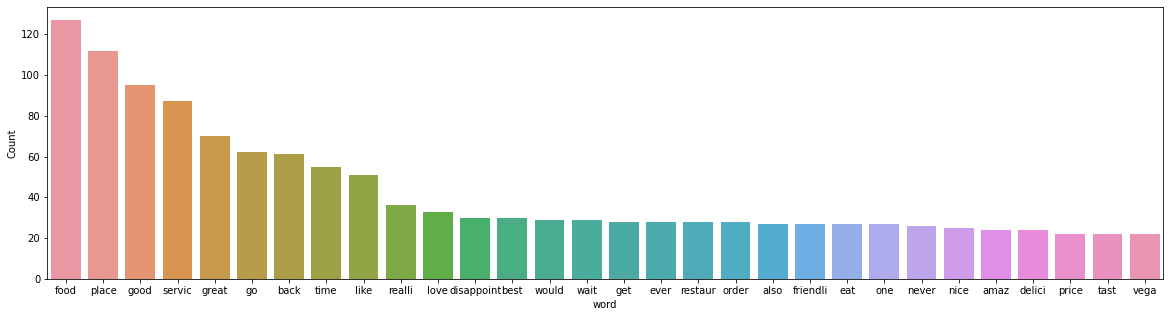

<Figure size 432x288 with 0 Axes>

In [777]:
freq_words(final_topic_matrix_all_df['index'])
plt.savefig('/Users/hernantrujillo/Documents/Metis/NBM_Unsupervised_Student-main/charts/freq_words.png')
plt.show()

Wordcloud

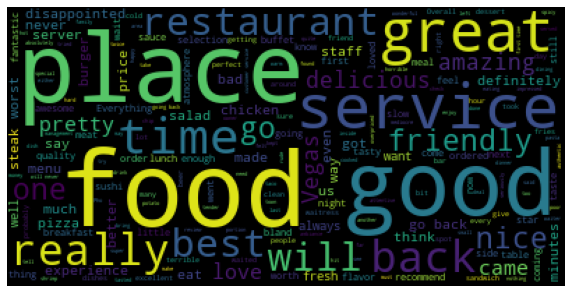

In [778]:
text = " ".join(i for i in df.Review)
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='hanning')
plt.axis("off")
plt.savefig('/Users/hernantrujillo/Documents/Metis/NBM_Unsupervised_Student-main/charts/wordcloud_cleaned.png')
plt.show()

3. Sentiment Analysis



In [758]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [759]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("The food was awesome")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [761]:
final_topic_matrix_all_df["index"].apply(lambda x: x.upper())

0                                         WOW LOVE PLACE
1                                             CRUST GOOD
2                                     TASTI TEXTUR NASTI
3      STOP LATE MAY BANK HOLIDAY RICK STEVE RECOMMEN...
4                                SELECT MENU GREAT PRICE
                             ...                        
995                        THINK FOOD FLAVOR TEXTUR LACK
996                               APPETIT INSTANTLI GONE
997                         OVERAL IMPRESS WOULD GO BACK
998    WHOLE EXPERI UNDERWHELM THINK GO NINJA SUSHI N...
999    WAST ENOUGH LIFE POUR SALT WOUND DRAW TIME TOO...
Name: index, Length: 1000, dtype: object

In [762]:
final_topic_matrix_all_df["index"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.111, 'pos': 0.889, 'comp...
1    {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...
2    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3    {'neg': 0.133, 'neu': 0.301, 'pos': 0.566, 'co...
4    {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...
5    {'neg': 0.386, 'neu': 0.429, 'pos': 0.186, 'co...
6    {'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'comp...
7    {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compou...
8    {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...
9    {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...
Name: index, dtype: object

In [763]:
final_topic_matrix_all_df["polarity_score"] = final_topic_matrix_all_df["index"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [764]:
final_topic_matrix_all_df.head()

,level_0,index,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,Review,Liked,polarity_score
0,0,wow love place,0.000000,0.098874,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.002525,0.0,0.000000,0.0,Wow... Loved this place.,1,0.8402
1,1,crust good,0.000000,0.000000,0.132903,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.011859,0.000000,0.0,0.000000,0.0,Crust is not good.,0,0.4404
2,2,tasti textur nasti,0.001148,0.000000,0.003103,0.000000,0.0,0.000000,0.0,0.0,...,0.002186,0.0,0.001118,0.004544,0.0,0.021171,0.0,Not tasty and the texture was just nasty.,0,0.0000
3,3,stop late may bank holiday rick steve recommen...,0.000000,0.003919,0.000000,0.000524,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,Stopped by during the late May bank holiday of...,1,0.8020
4,4,select menu great price,0.000000,0.000000,0.011412,0.000000,0.0,0.131895,0.0,0.0,...,0.001714,0.0,0.000000,0.000000,0.0,0.006368,0.0,The selection on the menu was great and so wer...,1,0.6249


4. Sentiment Modeling

In [766]:
final_topic_matrix_all_df["index"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    pos
1    pos
2    neg
3    pos
4    pos
5    neg
6    pos
7    pos
8    pos
9    pos
Name: index, dtype: object

In [768]:
final_topic_matrix_all_df["sentiment_label"] = final_topic_matrix_all_df["index"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
final_topic_matrix_all_df.head(10)

,level_0,index,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,Review,Liked,polarity_score,sentiment_label
0,0,wow love place,0.000000,0.098874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.002525,0.000000,0.000000,0.000000,Wow... Loved this place.,1,0.8402,pos
1,1,crust good,0.000000,0.000000,0.132903,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.011859,0.000000,0.000000,0.000000,0.000000,Crust is not good.,0,0.4404,pos
2,2,tasti textur nasti,0.001148,0.000000,0.003103,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001118,0.004544,0.000000,0.021171,0.000000,Not tasty and the texture was just nasty.,0,0.0000,neg
3,3,stop late may bank holiday rick steve recommen...,0.000000,0.003919,0.000000,0.000524,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Stopped by during the late May bank holiday of...,1,0.8020,pos
4,4,select menu great price,0.000000,0.000000,0.011412,0.000000,0.000000,0.131895,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.006368,0.000000,The selection on the menu was great and so wer...,1,0.6249,pos
5,5,get angri want damn pho,0.000000,0.004284,0.000190,0.000000,0.000474,0.000000,0.000000,0.000000,...,0.003010,0.000000,0.002083,0.000000,0.000638,0.000000,Now I am getting angry and I want my damn pho.,0,-0.3400,neg
6,6,honeslti tast fresh,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Honeslty it didn't taste THAT fresh.),0,0.3182,pos
7,7,potato like rubber could tell made ahead time ...,0.000000,0.000000,0.004206,0.000000,0.000000,0.000000,0.055961,0.081731,...,0.003325,0.001798,0.000000,0.003540,0.000000,0.001098,The potatoes were like rubber and you could te...,0,0.5719,pos
8,8,fri great,0.000000,0.000000,0.000000,0.000000,0.000000,0.182804,0.000000,0.001793,...,0.009434,0.000000,0.000000,0.117076,0.018655,0.000000,The fries were great too.,1,0.6249,pos
9,9,great touch,0.000000,0.000000,0.000000,0.000000,0.000000,0.158483,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A great touch.,1,0.6249,pos


In [770]:
df_sentiment_analysis = final_topic_matrix_all_df[['index', 'Liked', 'polarity_score', 'sentiment_label']]
df_sentiment_analysis

,index,Liked,polarity_score,sentiment_label
0,wow love place,1,0.8402,pos
1,crust good,0,0.4404,pos
2,tasti textur nasti,0,0.0000,neg
3,stop late may bank holiday rick steve recommen...,1,0.8020,pos
4,select menu great price,1,0.6249,pos
...,...,...,...,...
995,think food flavor textur lack,0,-0.3182,neg
996,appetit instantli gone,0,0.0000,neg
997,overal impress would go back,0,0.4404,pos
998,whole experi underwhelm think go ninja sushi n...,0,0.0000,neg


In [793]:
sentiment = df_sentiment_analysis.groupby("sentiment_label")["Liked"].mean()
sentiment

sentiment_label
neg    0.337615
pos    0.694505
Name: Liked, dtype: float64

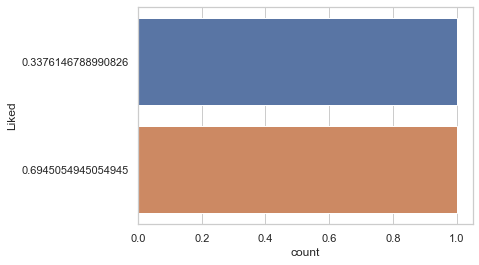

In [806]:
sns.countplot(y = sentiment)
plt.savefig('/Users/hernantrujillo/Documents/Metis/NBM_Unsupervised_Student-main/charts/sentiment.png')